In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:/Users/HP/Desktop/Tourism_In_India_Statistics_2018-Table_5 - Tourism_In_India_Statistics_2018-Table_5.csv")

In [4]:
df.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,5419608.0,668403.0,5663136.0,794556.0,4.5,18.9,12.0,6.9
1,Agra Circle,Agra Fort,1799953.0,441326.0,2008208.0,489822.0,11.6,11.0,11.0,5.0
2,Agra Circle,Akbar's Tomb Sikandara,418502.0,22389.0,362070.0,23638.0,-13.5,5.6,13.0,12.0
3,Agra Circle,Fatehpur Sikri,427854.0,126114.0,962069.0,301181.0,124.9,138.8,35.0,37.0
4,Agra Circle,Itimad-ud-Daulah,108392.0,129177.0,138524.0,76572.0,27.8,-40.7,15.0,9.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Circle                                        115 non-null    object 
 1   Name of the Monument                          115 non-null    object 
 2   Domestic - 2016-17                            115 non-null    float64
 3   Foreign - 2016-17                             115 non-null    float64
 4   Domestic - 2017-18                            115 non-null    float64
 5   Foreign - 2017-18                             115 non-null    float64
 6   Domestic Percentage growth - 2017-18/2016-17  114 non-null    float64
 7   Foreign Percentage growth - 2017-18/2016-17   113 non-null    float64
 8   Airport(in km)                                114 non-null    float64
 9   Railway(in km)                                113 non-null    flo

In [6]:
df_z_scaled = df.copy()

for column in df_z_scaled.columns[2:]:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean())/(df_z_scaled[column].std())

df_z_scaled.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,7.087695,7.325700,6.715659,7.710273,-0.435035,-0.127547,-0.774797,-0.334820
1,Agra Circle,Agra Fort,1.987806,4.736556,1.994686,4.630932,-0.364201,-0.128342,-0.790259,-0.387115
2,Agra Circle,Akbar's Tomb Sikandara,0.041419,-0.040185,-0.131586,-0.079864,-0.614616,-0.128886,-0.759334,-0.194448
3,Agra Circle,Fatehpur Sikri,0.054595,1.142493,0.643416,2.724712,0.766156,-0.115478,-0.419151,0.493650
4,Agra Circle,Itimad-ud-Daulah,-0.395508,1.177417,-0.420335,0.455034,-0.202579,-0.133546,-0.728408,-0.277020


In [7]:
df_min_max_scaled = df.copy()

for column in df_min_max_scaled.columns[2:]:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min())/(df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

df_min_max_scaled.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,1.000000,1.000000,1.000000,1.000000,0.130951,0.001170,0.039837,0.022261
1,Agra Circle,Agra Fort,0.332119,0.660269,0.354611,0.616473,0.140111,0.001093,0.036432,0.015652
2,Agra Circle,Akbar's Tomb Sikandara,0.077220,0.033496,0.063935,0.029750,0.107728,0.001040,0.043241,0.040000
3,Agra Circle,Fatehpur Sikri,0.078946,0.188680,0.169883,0.379056,0.286286,0.002351,0.118148,0.126957
4,Agra Circle,Itimad-ud-Daulah,0.020000,0.193262,0.024461,0.096371,0.161011,0.000584,0.050051,0.029565


Text(0, 0.5, 'Foreign Tourist')

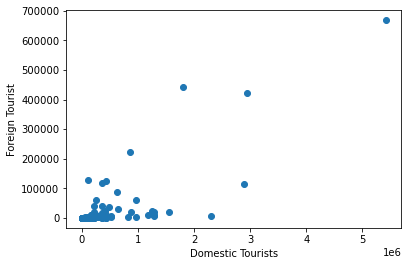

In [8]:
df=df.dropna()
df_num = df.to_numpy()
x = list(map(int,df_num[:,2]))
y = list(map(int,df_num[:,3]))
# PLot b/w the Domestic Tourists(x-axis) and Foreign Tourist(y-axis) (2016-2017)
plt.scatter(x,y)
plt.xlabel("Domestic Tourists")
plt.ylabel("Foreign Tourist")


Text(0, 0.5, 'Change in Domestic Tourists')

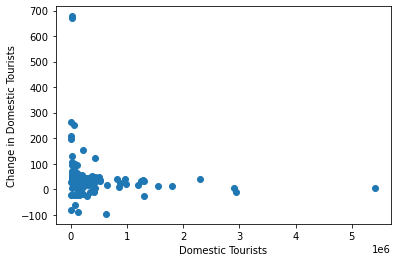

In [9]:
x = list(map(int,df_num[:,2]))
y = list(map(int,df_num[:,6]))
# PLot b/w the Domestic Tourists(x-axis) and Change in Domestic Tourists(y-axis) 
plt.scatter(x,y)
plt.xlabel("Domestic Tourists")
plt.ylabel("Change in Domestic Tourists")

Text(0, 0.5, 'Change in Forign Tourists')

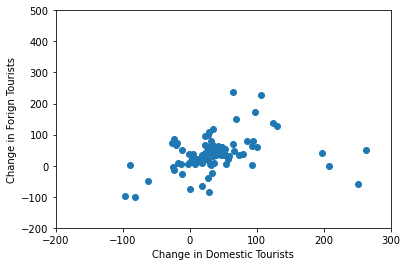

In [10]:
x = list(map(int,df_num[:,6]))
y = list(map(int,df_num[:,7]))
# PLot b/w the Change in Domestic Tourists(x-axis) and Change in Forign Tourists(y-axis) 
plt.scatter(x,y)
plt.xlim(-200,300)
plt.ylim(-200,500)
plt.xlabel("Change in Domestic Tourists")
plt.ylabel("Change in Forign Tourists")

C:\Users\HP\anaconda3\envs\tensorflow-sessions\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


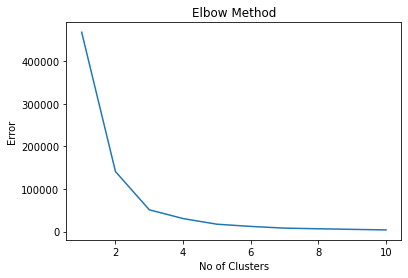

In [11]:
Error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_num[:,8:9])
    Error.append(kmeans.inertia_)
plt.plot(range(1,11),Error)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Error")
plt.show()

In [12]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(df_num[:,8:9])
y_kmeans3 = kmeans3.predict(df_num[:,8:9])
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 1 0 0 1 2 2 2 1 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 2 1 1 1 0 2 1 0 0 1 0 0 0 2 1 1 0 1 1 0 1
 1]


Text(0, 0.5, 'Airport Distance')

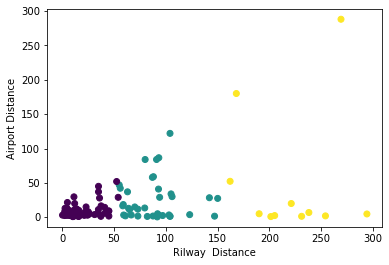

In [13]:
plt.scatter(df_num[:,8],df_num[:,9],c=y_kmeans3)
plt.xlabel("Rilway  Distance")
plt.ylabel("Airport Distance")

In [14]:
df


,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,5419608.0,668403.0,5663136.0,794556.0,4.5,18.9,12.0,6.9
1,Agra Circle,Agra Fort,1799953.0,441326.0,2008208.0,489822.0,11.6,11.0,11.0,5.0
2,Agra Circle,Akbar's Tomb Sikandara,418502.0,22389.0,362070.0,23638.0,-13.5,5.6,13.0,12.0
3,Agra Circle,Fatehpur Sikri,427854.0,126114.0,962069.0,301181.0,124.9,138.8,35.0,37.0
4,Agra Circle,Itimad-ud-Daulah,108392.0,129177.0,138524.0,76572.0,27.8,-40.7,15.0,9.0
...,...,...,...,...,...,...,...,...,...,...
108,Vadodara Circle,Sun Temple Modhera,332237.0,3339.0,293019.0,5062.0,-11.8,51.6,94.0,29.0
109,Vadodara Circle,Rani-ki-Vav Patan,299893.0,3586.0,427305.0,5836.0,42.5,62.7,123.0,3.8
110,Vadodara Circle,Jama Masjid Saherki Masjid Champaner- Pavagadh,143888.0,1981.0,112384.0,3333.0,-21.9,68.2,43.0,7.4
111,Vadodara Circle,Buddhist Caves Junagadh,30122.0,795.0,40918.0,1241.0,35.8,56.1,104.0,1.4


([<matplotlib.patches.Wedge at 0x196ca3179c8>,
 [Text(1.0930834302648262, 0.12316092919623813, 'Agra Circle'),
  Text(1.0480526313649945, 0.33404443101017445, 'Patna Circle'),
  Text(0.9474438826460512, 0.5588828940275197, 'Delhi Circle'),
  Text(0.7993263397077087, 0.7556966340069782, 'Hampi Mini Circle'),
  Text(0.5852352639231669, 0.9313966318710742, 'Hyderabad Circle'),
  Text(0.33404439421301074, 1.048052643093305, 'Sarnath Circle'),
  Text(-3.862103732302945e-08, 1.0999999999999994, 'Aurangabad Circle'),
  Text(-0.30451911293310907, 1.0570090396294785, 'Bengaluru Circle'),
  Text(-0.532090825714007, 0.9627457365218431, 'Kolkata Circle'),
  Text(-0.8202064218121888, 0.7329811904940303, 'Shimla Mini Circle'),
  Text(-0.9627457956806391, 0.5320907186742251, 'Bhopal Circle'),
  Text(-1.0651338913309232, 0.27475406009419673, 'Lucknow Circle'),
  Text(-1.0570090342836402, -0.3045191314889204, 'Vadodara Circle'),
  Text(-0.8600145819818559, -0.6858388431538228, 'Mumbai Circle'),
  Text(

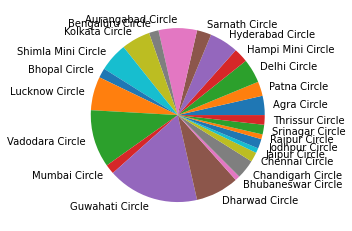

In [15]:
from sklearn.naive_bayes import GaussianNB
from collections import defaultdict
model = GaussianNB()
X=df.drop(['Circle','Name of the Monument'],axis=1)
y = df['Circle']
model.fit(X,y)
GB_labels = model.predict(X)
data = defaultdict(int)
for i in GB_labels:
    data[i]+=1

plt.pie(np.array(list(data.values())),labels=list(data.keys()))

In [16]:
df_foreign = df[['Foreign - 2016-17','Foreign Percentage growth - 2017-18/2016-17']]
df_foreign

,Foreign - 2016-17,Foreign Percentage growth - 2017-18/2016-17
0,668403.0,18.9
1,441326.0,11.0
2,22389.0,5.6
3,126114.0,138.8
4,129177.0,-40.7
...,...,...
108,3339.0,51.6
109,3586.0,62.7
110,1981.0,68.2
111,795.0,56.1


In [22]:
from sklearn.linear_model import LinearRegression
y = df['Foreign - 2016-17']
X = df[['Airport(in km)','Railway(in km)']]
model = LinearRegression().fit(X,y)
prediction = model.predict(X)

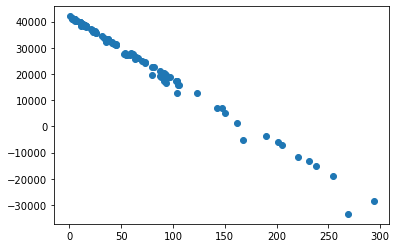

In [23]:
plt.scatter(df['Airport(in km)'],prediction)